# Part 1) Import stock data from Yahoo using pandas_datareader

In [1]:
#install zipline package
!pip install zipline

# install a sub-package of pandas 'pandas-datareader' to get stock data from google or yahoo
!pip install pandas-datareader

In [0]:
# import libraries
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime

# set the size for plots
plt.rcParams["figure.figsize"] = (18,6)


## Import stock data from Yahoo

In [0]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
stocks = ['AAPL', 'MSFT', 'FB']

In [0]:
# Set the starting point and ending point of data that you want to retrieve
start_date = '2000-01-01'
end_date = '2016-12-31'

In [0]:
# Use pandas_reader.data.DataReader to load the desired data.
# Default values of start and end are 2010-01-01 and the date you request the data
panel_data = data.DataReader(stocks, 'yahoo', start_date, end_date)

In [6]:
# Check the first 9 entries
# Data has high, low, open, close, adjusted close prices ans volume.
panel_data.head(9)

Attributes      High                     Low                    Open      \
Symbols         AAPL  FB      MSFT      AAPL  FB      MSFT      AAPL  FB   
Date                                                                       
2000-01-03  4.017857 NaN  59.31250  3.631696 NaN  56.00000  3.745536 NaN   
2000-01-04  3.950893 NaN  58.56250  3.613839 NaN  56.12500  3.866071 NaN   
2000-01-05  3.948661 NaN  58.18750  3.678571 NaN  54.68750  3.705357 NaN   
2000-01-06  3.821429 NaN  56.93750  3.392857 NaN  54.18750  3.790179 NaN   
2000-01-07  3.607143 NaN  56.12500  3.410714 NaN  53.65625  3.446429 NaN   
2000-01-10  3.651786 NaN  56.84375  3.383929 NaN  55.68750  3.642857 NaN   
2000-01-11  3.549107 NaN  57.12500  3.232143 NaN  54.34375  3.426339 NaN   
2000-01-12  3.410714 NaN  54.43750  3.089286 NaN  52.21875  3.392857 NaN   
2000-01-13  3.526786 NaN  54.31250  3.303571 NaN  50.75000  3.374439 NaN   

Attributes               Close                     Volume                  \
Symbols         MSFT      AAPL  FB      MSFT         AAPL  FB        MSFT   
Date                                                                        
2000-01-03  58.68750  3.997768 NaN  58.28125  133949200.0 NaN  53228400.0   
2000-01-04  56.78125  3.660714 NaN  56.31250  128094400.0 NaN  54119000.0   
2000-01-05  55.56250  3.714286 NaN  56.90625  194580400.0 NaN  64059600.0   
2000-01-06  56.09375  3.392857 NaN  55.00000  191993200.0 NaN  54976600.0   
2000-01-07  54.31250  3.553571 NaN  55.71875  115183600.0 NaN  62013600.0   
2000-01-10  56.71875  3.491071 NaN  56.12500  126266000.0 NaN  44963600.0   
2000-01-11  55.75000  3.312500 NaN  54.68750  110387200.0 NaN  46743600.0   
2000-01-12  54.25000  3.113839 NaN  52.90625  244017200.0 NaN  66532400.0   
2000-01-13  52.18750  3.455357 NaN  53.90625  258171200.0 NaN  83144000.0   

Attributes Adj Close                 
Symbols         AAPL  FB       MSFT  
Date                                 
2000-01-03  2.655498 NaN  41.959995  
2000-01-04  2.431611 NaN  40.542572  
2000-01-05  2.467196 NaN  40.970074  
2000-01-06  2.253689 NaN  39.597641  
2000-01-07  2.360442 NaN  40.115097  
2000-01-10  2.318927 NaN  40.407604  
2000-01-11  2.200312 NaN  39.372654  
2000-01-12  2.068352 NaN  38.090237  
2000-01-13  2.295204 NaN  38.810188

In [0]:
# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = panel_data['Close']

# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# Align the existing price data with our new sets of data by reindexing price data by weekdays
close = close.reindex(all_weekdays)

# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument.
close = close.fillna(method='ffill')

In [8]:
# Check if weekdays are well set
print(all_weekdays)

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
               '2016-12-23', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', length=4435, freq='B')


In [9]:
# Check close price data with the reindexed order by weekdays
close.head(10)

Symbols         AAPL  FB      MSFT
2000-01-03  3.997768 NaN  58.28125
2000-01-04  3.660714 NaN  56.31250
2000-01-05  3.714286 NaN  56.90625
2000-01-06  3.392857 NaN  55.00000
2000-01-07  3.553571 NaN  55.71875
2000-01-10  3.491071 NaN  56.12500
2000-01-11  3.312500 NaN  54.68750
2000-01-12  3.113839 NaN  52.90625
2000-01-13  3.455357 NaN  53.90625
2000-01-14  3.587054 NaN  56.12500

In [10]:
# descriptive data
close.describe()

Symbols         AAPL           FB         MSFT
count    4435.000000  1206.000000  4435.000000
mean       37.760867    70.336874    31.876942
std        39.801695    34.153887     9.217135
min         0.937143    17.730000    15.150000
25%         3.573661    32.184999    26.037500
50%        19.441429    74.584999    28.480000
75%        69.937855    97.935001    34.531250
max       133.000000   133.279999    63.619999

## Plotting close price and average prices of Microsoft stock

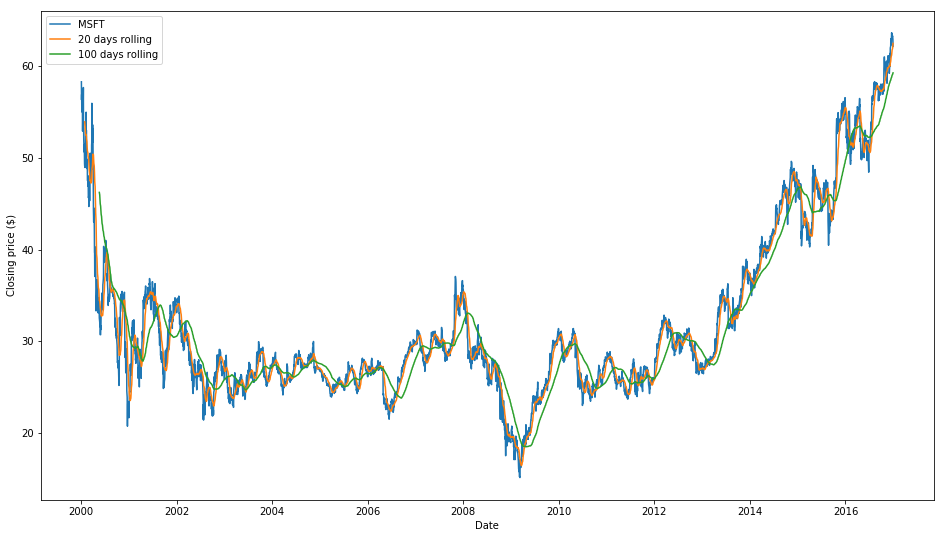

In [11]:
# Get the MSFT timeseries. This now returns a Pandas Series object indexed by date.
msft = close.loc[:, 'MSFT']

# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_msft = msft.rolling(window=20).mean()
long_rolling_msft = msft.rolling(window=100).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(msft.index, msft, label='MSFT')
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Closing price ($)')
ax.legend()

## Visualizing a daily price difference 

In [0]:
import seaborn as sns
import numpy as np
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [13]:
# Getting average price over 20 days using rolling object offered by pandas
short_rolling = close.rolling(window=20).mean()
short_rolling.tail()

Symbols           AAPL          FB     MSFT
2016-12-26  113.648999  118.455499  61.8880
2016-12-27  113.939000  118.312499  61.9975
2016-12-28  114.251000  118.237499  62.1340
2016-12-29  114.613000  118.299999  62.3190
2016-12-30  114.909000  118.282499  62.4635

In [14]:
# Getting average price over 100 days using rolling object offered by pandas
long_rolling = close.rolling(window=100).mean()
long_rolling.tail()

Symbols         AAPL        FB     MSFT
2016-12-26  111.7931  124.5234  59.0630
2016-12-27  111.8776  124.4529  59.1138
2016-12-28  111.9652  124.3733  59.1635
2016-12-29  112.0532  124.2878  59.2095
2016-12-30  112.1296  124.1895  59.2515

In [15]:
# Relative returns
returns = close.pct_change(1)
returns.head(10)

Symbols         AAPL  FB      MSFT
2000-01-03       NaN NaN       NaN
2000-01-04 -0.084310 NaN -0.033780
2000-01-05  0.014634 NaN  0.010544
2000-01-06 -0.086538 NaN -0.033498
2000-01-07  0.047368 NaN  0.013068
2000-01-10 -0.017588 NaN  0.007291
2000-01-11 -0.051151 NaN -0.025612
2000-01-12 -0.059973 NaN -0.032571
2000-01-13  0.109677 NaN  0.018901
2000-01-14  0.038114 NaN  0.041159

In [16]:
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
log_returns = np.log(close).diff()
log_returns.tail()

Symbols         AAPL        FB      MSFT
2016-12-26  0.000000  0.000000  0.000000
2016-12-27  0.006331  0.006290  0.000632
2016-12-28 -0.004273 -0.009279 -0.004593
2016-12-29 -0.000257 -0.004887 -0.001430
2016-12-30 -0.007826 -0.011236 -0.012156

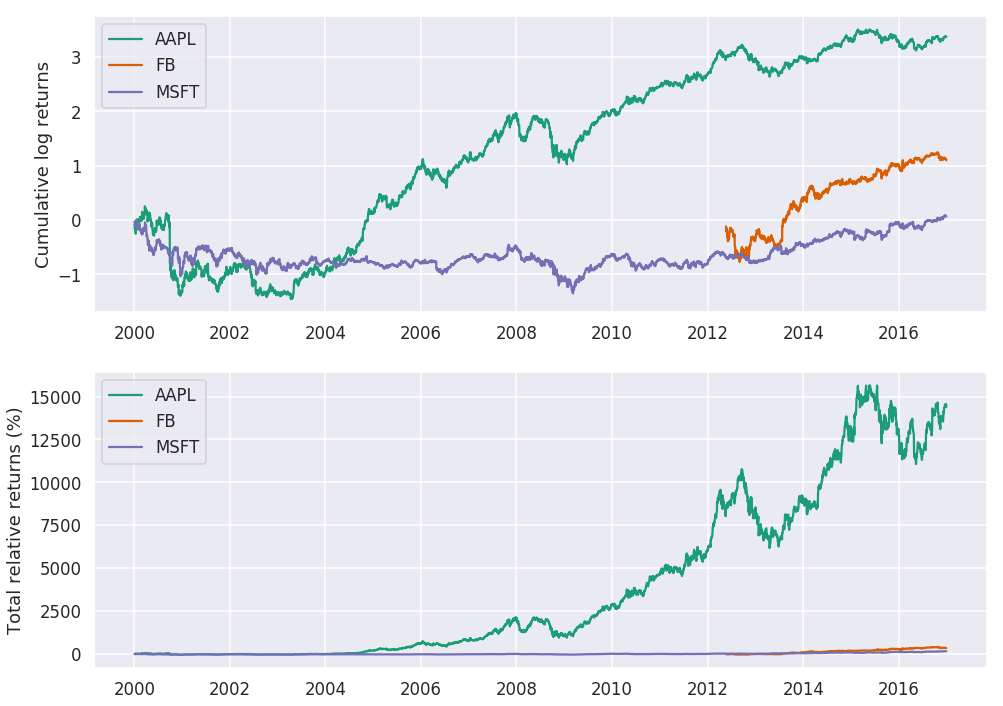

In [17]:
#Stock split?
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

for c in log_returns:
    ax1.plot(log_returns.index, log_returns[c].cumsum(), label=str(c))

ax1.set_ylabel('Cumulative log returns')
ax1.legend(loc='best')

for c in returns:
    ax2.plot(returns.index, 100*(np.exp(returns[c].cumsum()) - 1), label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')

plt.show()

# Part 2) Start Algorithmic trading using Zipline

In [0]:
from zipline.api import order, record, symbol


def initialize(context):
    pass

# order func: buy or sell stock
# record func: save the result data of trading
def handle_data(context, data):
    order(symbol('AAPL'), 1)
    record(AAPL=data.current(symbol('AAPL'), 'price'))

In [0]:
# Set the starting point and the ending point
start_date = '2010-01-01'
end_date = '2019-05-17'

In [0]:
# Get Apple stock data from Yahoo finance
apple = data.DataReader("AAPL", "yahoo", start_date, end_date)

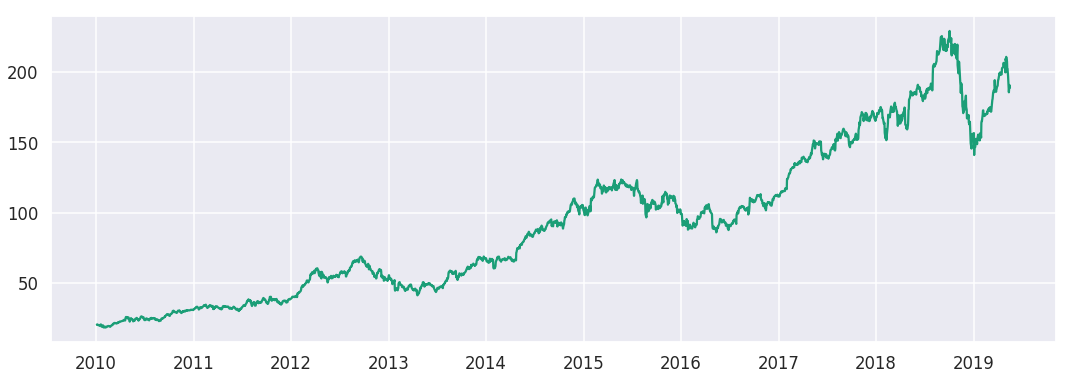

In [21]:
# See if data is well retrieved

plt.plot(apple.index, apple['Adj Close'])
plt.show()

In [22]:
# And in this example, we are only using adjusted close price
apple = apple[['Adj Close']]
apple.head()

Adj Close
Date                 
2010-01-04  20.307869
2010-01-05  20.342979
2010-01-06  20.019398
2010-01-07  19.982389
2010-01-08  20.115240

In [23]:
# Since handle_data function reads the index by 'AAPL', change the index from 'Adj Close' to 'AAPL'
apple.columns = ["AAPL"]
apple.head()

AAPL
Date                 
2010-01-04  20.307869
2010-01-05  20.342979
2010-01-06  20.019398
2010-01-07  19.982389
2010-01-08  20.115240

In [24]:
# Change the time index to the form of UTC so that zipline package can work
apple = apple.tz_localize("UTC")
apple.head()

AAPL
Date                                
2010-01-04 00:00:00+00:00  20.307869
2010-01-05 00:00:00+00:00  20.342979
2010-01-06 00:00:00+00:00  20.019398
2010-01-07 00:00:00+00:00  19.982389
2010-01-08 00:00:00+00:00  20.115240

In [0]:
# for backtesting, zipline uses an instance from class 'TradingAlgorithm'
from zipline.algorithm import TradingAlgorithm

In [0]:
# call an instance of TradingAlgorithm to run an algorithm which buys one stock of Apple everyday
algo = TradingAlgorithm(initialize=initialize, handle_data=handle_data)

In [27]:
# record a result dataframe in a variable 'result'
result = algo.run(apple)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  """Entry point for launching an IPython kernel.


In [28]:
# Check the data type of the result. It wiil be pandas.dataframe instance
type(result)

pandas.core.frame.DataFrame

In [29]:
# see how the result dataframe looks like
result.head()

AAPL  algo_volatility  \
2010-01-04 21:00:00+00:00  20.307869              NaN   
2010-01-05 21:00:00+00:00  20.342979         0.000001   
2010-01-06 21:00:00+00:00  20.019398         0.000030   
2010-01-07 21:00:00+00:00  19.982389         0.000025   
2010-01-08 21:00:00+00:00  20.115240         0.000041   

                           algorithm_period_return  alpha  \
2010-01-04 21:00:00+00:00             0.000000e+00    NaN   
2010-01-05 21:00:00+00:00            -1.117149e-07    NaN   
2010-01-06 21:00:00+00:00            -3.457629e-06    NaN   
2010-01-07 21:00:00+00:00            -4.307706e-06    NaN   
2010-01-08 21:00:00+00:00            -4.327633e-07    NaN   

                           benchmark_period_return  benchmark_volatility  \
2010-01-04 21:00:00+00:00                -0.006305                   NaN   
2010-01-05 21:00:00+00:00                -0.012569                   0.0   
2010-01-06 21:00:00+00:00                -0.018795                   0.0   
2010-01-07 21:00:00+00:00                -0.024981                   0.0   
2010-01-08 21:00:00+00:00                -0.031128                   0.0   

                           beta  capital_used    ending_cash  ending_exposure  \
2010-01-04 21:00:00+00:00   NaN      0.000000  100000.000000         0.000000   
2010-01-05 21:00:00+00:00   NaN    -20.354151   99979.645849        20.342979   
2010-01-06 21:00:00+00:00   NaN    -20.030407   99959.615442        40.038795   
2010-01-07 21:00:00+00:00   NaN    -19.993381   99939.622061        59.947168   
2010-01-08 21:00:00+00:00   NaN    -20.126298   99919.495763        80.460960   

                                   ...            short_exposure  short_value  \
2010-01-04 21:00:00+00:00          ...                       0.0          0.0   
2010-01-05 21:00:00+00:00          ...                       0.0          0.0   
2010-01-06 21:00:00+00:00          ...                       0.0          0.0   
2010-01-07 21:00:00+00:00          ...                       0.0          0.0   
2010-01-08 21:00:00+00:00          ...                       0.0          0.0   

                           shorts_count    sortino  starting_cash  \
2010-01-04 21:00:00+00:00             0        NaN  100000.000000   
2010-01-05 21:00:00+00:00             0 -11.224972  100000.000000   
2010-01-06 21:00:00+00:00             0  -9.465887   99979.645849   
2010-01-07 21:00:00+00:00             0  -9.899010   99959.615442   
2010-01-08 21:00:00+00:00             0  -0.889462   99939.622061   

                           starting_exposure  starting_value  trading_days  \
2010-01-04 21:00:00+00:00           0.000000        0.000000             1   
2010-01-05 21:00:00+00:00           0.000000        0.000000             2   
2010-01-06 21:00:00+00:00          20.342979       20.342979             3   
2010-01-07 21:00:00+00:00          40.038795       40.038795             4   
2010-01-08 21:00:00+00:00          59.947168       59.947168             5   

                                                                transactions  \
2010-01-04 21:00:00+00:00                                                 []   
2010-01-05 21:00:00+00:00  [{u'commission': None, u'amount': 1, u'sid': E...   
2010-01-06 21:00:00+00:00  [{u'commission': None, u'amount': 1, u'sid': E...   
2010-01-07 21:00:00+00:00  [{u'commission': None, u'amount': 1, u'sid': E...   
2010-01-08 21:00:00+00:00  [{u'commission': None, u'amount': 1, u'sid': E...   

                          treasury_period_return  
2010-01-04 21:00:00+00:00                    0.0  
2010-01-05 21:00:00+00:00                    0.0  
2010-01-06 21:00:00+00:00                    0.0  
2010-01-07 21:00:00+00:00                    0.0  
2010-01-08 21:00:00+00:00                    0.0  

[5 rows x 38 columns]

In [30]:
# extract three key data, the amount of cash before and after the trade of each day and the total value of stocks you have
result[['starting_cash', 'ending_cash', 'ending_value']].head()

starting_cash    ending_cash  ending_value
2010-01-04 21:00:00+00:00  100000.000000  100000.000000      0.000000
2010-01-05 21:00:00+00:00  100000.000000   99979.645849     20.342979
2010-01-06 21:00:00+00:00   99979.645849   99959.615442     40.038795
2010-01-07 21:00:00+00:00   99959.615442   99939.622061     59.947168
2010-01-08 21:00:00+00:00   99939.622061   99919.495763     80.460960

In [31]:
# zipline offers 'portfolio_value' as a sum of ending_cash and ending_value

result.portfolio_value.tail()

2019-05-13 20:00:00+00:00    320857.412977
2019-05-14 20:00:00+00:00    327778.083394
2019-05-15 20:00:00+00:00    333100.273998
2019-05-16 20:00:00+00:00    331121.146586
2019-05-17 20:00:00+00:00    328575.486770
Name: portfolio_value, dtype: float64

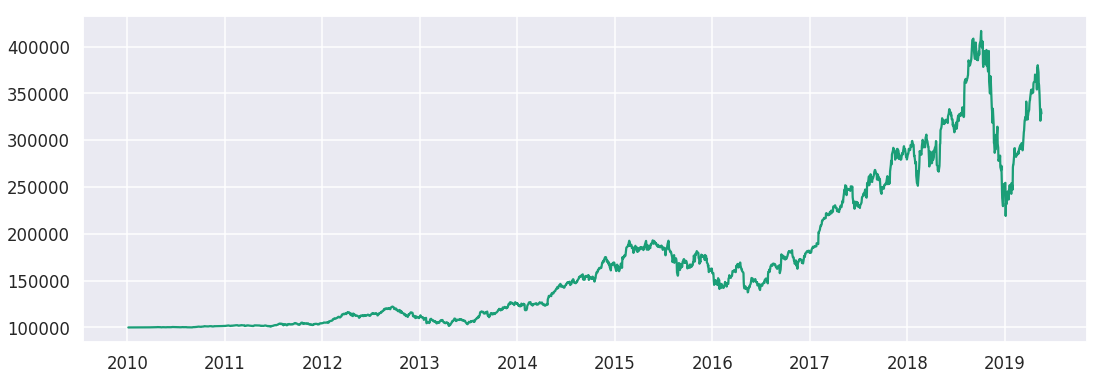

In [32]:
# let's see how your net value will be when you buy 1 stock of Apple everyday from 2010-01-01

plt.plot(result.index, result.portfolio_value, markersize=12)

## Moving Average Strategy

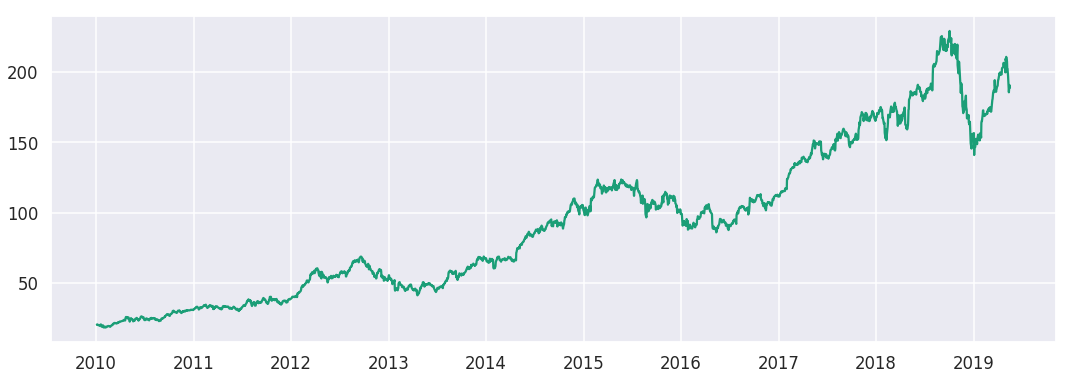

In [33]:
# Let's try another backtest example
# import apple stock data from yahoo again

apple2 = data.DataReader("AAPL", "yahoo", start_date, end_date)


plt.plot(apple.index, apple2['Adj Close'])

In [34]:
# Do the same datacleaning as earlier code
apple2 = apple2[['Adj Close']]
apple2.columns = ["AAPL"]
apple2 = apple2.tz_localize("UTC")

apple2.head()

AAPL
Date                                
2010-01-04 00:00:00+00:00  20.307869
2010-01-05 00:00:00+00:00  20.342979
2010-01-06 00:00:00+00:00  20.019398
2010-01-07 00:00:00+00:00  19.982389
2010-01-08 00:00:00+00:00  20.115240

In [0]:
from zipline.api import order_target, record, symbol

In [0]:
def initialize(context):
  context.i = 0
  context.sym = symbol('AAPL')

In [0]:
def handle_data(context, apple2):
    context.i += 1
    if context.i < 20:
        return

    ma5 = apple2.history(context.sym, 'price', 5, '1d').mean()
    ma20 = apple2.history(context.sym, 'price', 20, '1d').mean()

    if ma5 > ma20:
        order_target(context.sym, 1)
    else:
        order_target(context.sym, -1)

    record(AAPL=apple2.current(context.sym, "price"), ma5=ma5, ma20=ma20)

In [38]:
algo = TradingAlgorithm(initialize=initialize, handle_data=handle_data)
result = algo.run(apple2)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  
/usr/local/lib/python2.7/dist-packages/empyrical/stats.py:790: RuntimeWarning: invalid value encountered in divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
/usr/local/lib/python2.7/dist-packages/empyrical/stats.py:704: RuntimeWarning: invalid value encountered in divide
  out=out,


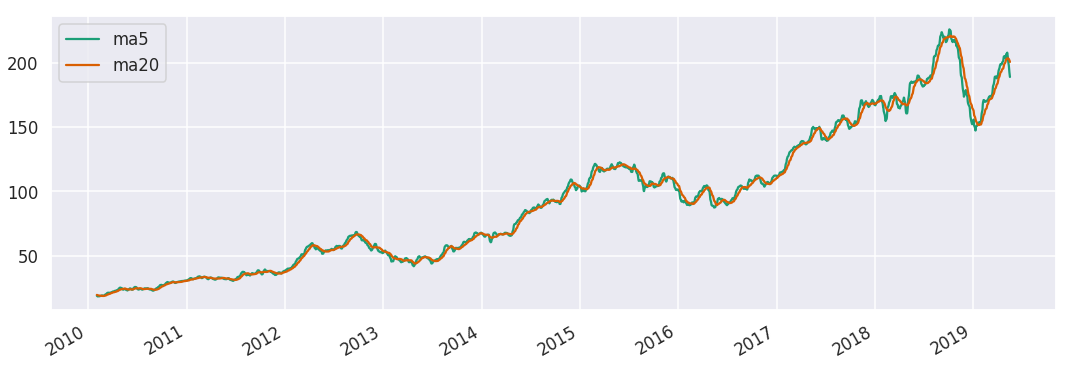

In [39]:
result[['ma5', 'ma20']].plot()

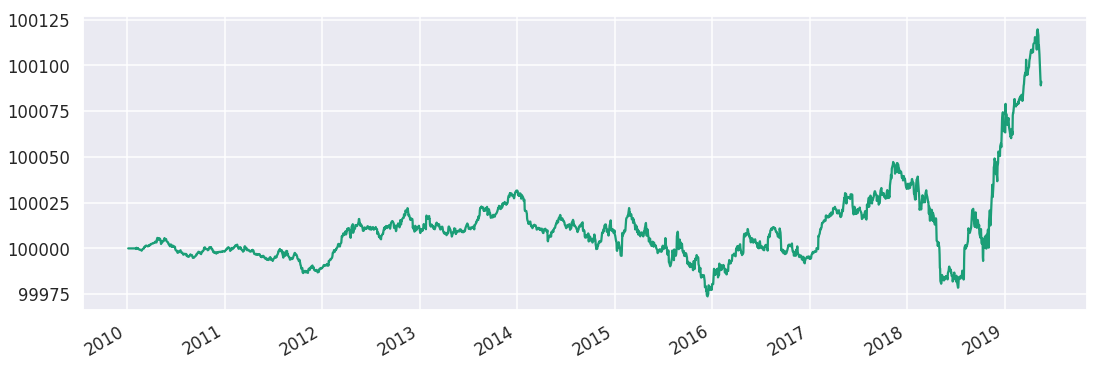

In [40]:
result['portfolio_value'].plot()

## Improving the Moving Average Strategy

In [0]:
# context.hold = a variable for either to sell the stock or hold the stock
# initialized with false value
def initialize(context):
    context.i = 0
    context.sym = symbol('AAPL')
    context.hold = False

In [0]:
def handle_data(context, data):
    context.i += 1
    if context.i < 20:
        return

    buy = False
    sell = False

    ma5 = data.history(context.sym, 'price', 5, '1d').mean()
    ma20 = data.history(context.sym, 'price', 20, '1d').mean()

    if ma5 > ma20 and context.hold == False:
        order_target(context.sym, 100)
        context.hold = True
        buy = True
    elif ma5 < ma20 and context.hold == True:
        order_target(context.sym, -100)
        context.hold = False
        sell = True

    record(AAPL=data.current(context.sym, "price"), ma5=ma5, ma20=ma20, buy=buy, sell=sell)

In [43]:
algo = TradingAlgorithm(initialize=initialize, handle_data=handle_data)
result = algo.run(apple2)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  


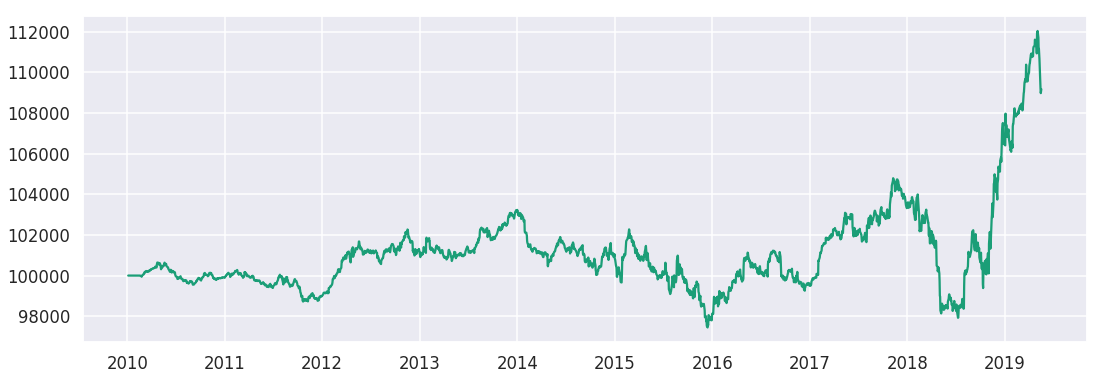

In [44]:
plt.plot(result.index, result.portfolio_value)
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


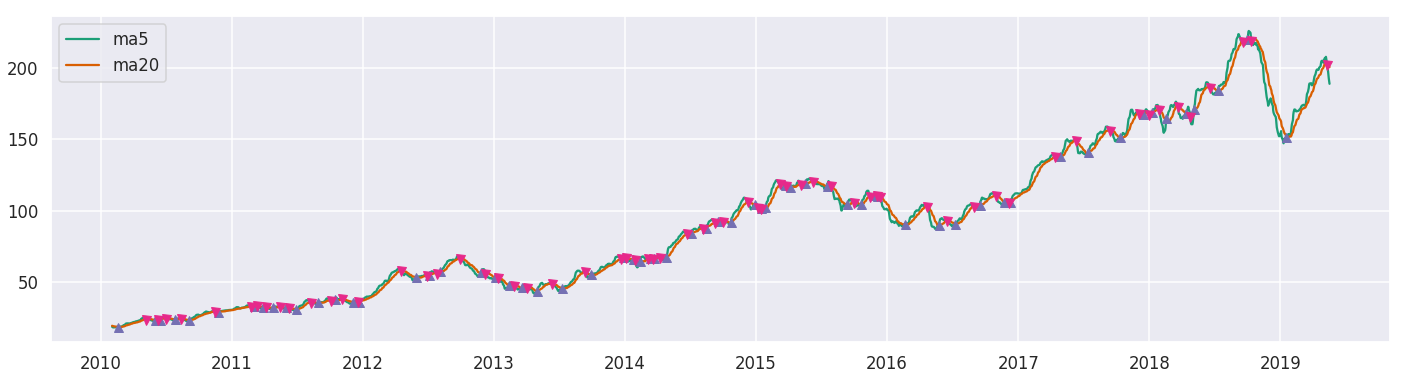

In [45]:
plt.rcParams["figure.figsize"] = (24,6)

plt.plot(result.index, result.ma5)
plt.plot(result.index, result.ma20)
plt.legend(loc='best')

plt.plot(result.ix[result.buy == True].index, result.ma5[result.buy == True], '^')
plt.plot(result.ix[result.sell == True].index, result.ma5[result.sell == True], 'v')

plt.show()